# 데이터 불러오기

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/dataset_사용 - after_scale.csv')

In [ ]:
df.head()

,district,living_pop,v1,v2,v3,distance
0,종로구,0.082357,0.037497,0.037638,0.241912,3.144022
1,중구,0.060367,0.000000,0.000000,0.206892,3.144022
2,용산구,0.108371,0.188151,0.188285,0.355105,3.144022
3,성동구,0.208470,0.309860,0.310575,0.454846,3.144022
4,광진구,0.241341,0.441174,0.441546,0.550211,3.144022


# 데이터 전처리

In [ ]:
df = df.drop(['district'], axis=1)

# scree plot - 차원 결정

In [ ]:
from sklearn.decomposition import PCA

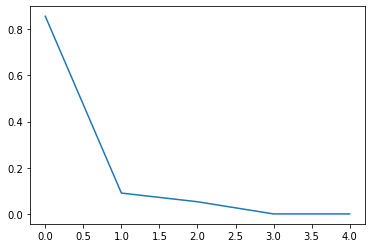

In [ ]:
import matplotlib.pyplot as plt
p = PCA(n_components = 5)
p.fit(df)
plt.plot(p.explained_variance_ratio_)

# PCA

In [ ]:
# 3차원으로 축소
pca = PCA(n_components=3)
pca.fit(df)

PCA(n_components=3)

In [ ]:
# 축소된 차원으로 데이터를 변환
z3 = pca.transform(df)

In [ ]:
z3

array([[-0.76203603,  0.097538  , -0.1061166 ],
       [-0.82816296,  0.1095921 , -0.10993719],
       [-0.5392782 ,  0.02380294, -0.04428937],
       [-0.31652426,  0.01489198, -0.0382187 ],
       [-0.11896585, -0.03978165,  0.01230926],
       [-0.13796868, -0.05206265,  0.00227926],
       [-0.00997874, -0.14405883,  0.03772588],
       [-0.15123135,  0.39905931,  0.41652343],
       [-0.31418907, -0.09931931,  0.00493314],
       [-0.2858232 , -0.14945117,  0.03434348],
       [ 0.43441033, -0.08954674,  0.01270001],
       [ 0.26928683, -0.13413019,  0.03525273],
       [-0.24304606,  0.00734198, -0.0386755 ],
       [-0.01481439,  0.06133892, -0.04119681],
       [ 0.12439192, -0.13348084,  0.07175299],
       [ 0.62713902, -0.09844963,  0.05298371],
       [ 0.15702782, -0.11638933,  0.02689479],
       [-0.49664378, -0.10746926,  0.02710287],
       [ 0.15776684,  0.03198727, -0.05092284],
       [-0.0031385 , -0.07182129,  0.02469877],
       [ 0.40249992, -0.08330264,  0.065

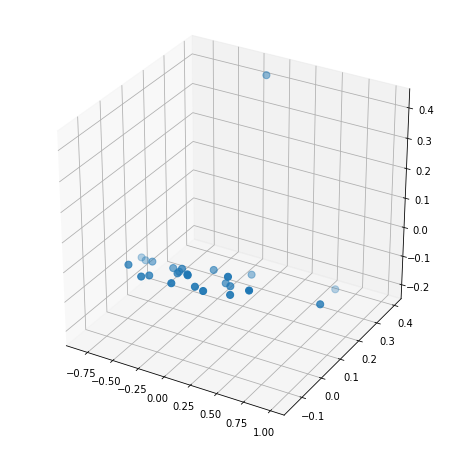

In [ ]:
# 시각화 - 3차원
# 참고 : https://www.python-graph-gallery.com/370-3d-scatterplot
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(
    z3[:, 0],
    z3[:, 1],
    z3[:, 2], 
    s = 50
)

In [ ]:
pca.explained_variance_ratio_

array([0.85685881, 0.09040996, 0.05273079])

In [ ]:
print(f'3차원 PCA는 분산의 {pca.explained_variance_ratio_.sum()*100:.2f}%를 설명')

3차원 PCA는 분산의 100.00%를 설명


In [ ]:
pca.components_

array([[ 0.49151275,  0.53362682,  0.53300625,  0.43538716,  0.        ],
       [ 0.71404423, -0.04298592, -0.04585194, -0.69727373,  0.        ],
       [-0.49854772,  0.46098514,  0.46335254, -0.56942716, -0.        ]])

In [ ]:
pca.components_.T

array([[ 0.49151275,  0.71404423, -0.49854772],
       [ 0.53362682, -0.04298592,  0.46098514],
       [ 0.53300625, -0.04585194,  0.46335254],
       [ 0.43538716, -0.69727373, -0.56942716],
       [ 0.        ,  0.        , -0.        ]])

In [ ]:
# PC1 = v3이 낮음 -> 3차 접종률 높일 수 있는 방안
# PC2 = 생활인구수가 특출나게 높음 -> 생활인구수를 줄이는 방안?
# PC3 = v3이 낮고, 생활인구수도 낮음 -> 사람이 잘 안다니지만... 백신접종률이 낮아.

# 3차 접종률 낮은 지역 : 성북구
# 생활인구수가 많은 지역 : 강남구, 송파구
# 사람이 많지 않지만 v3가 낮은지역 : 중구, 종로구, 용산구
pd.DataFrame(pca.components_.T, columns = ['PC1', 'PC2', 'PC3'], index = df.columns)

,PC1,PC2,PC3
living_pop,0.491513,0.714044,-0.498548
v1,0.533627,-0.042986,0.460985
v2,0.533006,-0.045852,0.463353
v3,0.435387,-0.697274,-0.569427
distance,0.000000,0.000000,-0.000000


2차원

In [ ]:
pca = PCA(n_components=2)
pca.fit(df)

PCA(n_components=2)

In [ ]:
z2 = pca.transform(df)

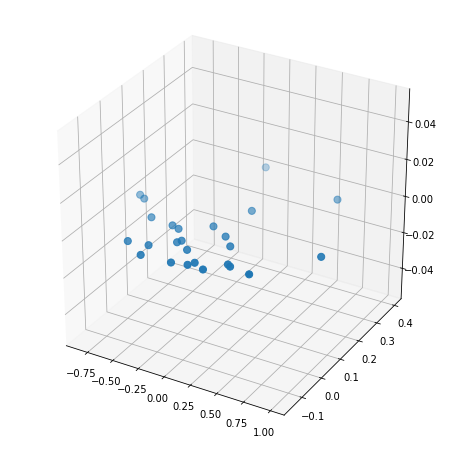

In [ ]:
# 시각화 - 3차원
# 참고 : https://www.python-graph-gallery.com/370-3d-scatterplot
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(
    z3[:, 0],
    z3[:, 1],
    s = 50
)

In [ ]:
pca.explained_variance_ratio_

array([0.85685881, 0.09040996])

In [ ]:
print(f'2차원 PCA는 분산의 {pca.explained_variance_ratio_.sum()*100:.2f}%를 설명')

2차원 PCA는 분산의 94.73%를 설명


In [ ]:
pca.components_

array([[ 0.49151275,  0.53362682,  0.53300625,  0.43538716,  0.        ],
       [ 0.71404423, -0.04298592, -0.04585194, -0.69727373,  0.        ]])

In [ ]:
pca.components_.T

array([[ 0.49151275,  0.71404423],
       [ 0.53362682, -0.04298592],
       [ 0.53300625, -0.04585194],
       [ 0.43538716, -0.69727373],
       [ 0.        ,  0.        ]])

In [ ]:
# PC1 = 생활인구수가 높음
# PC2 = 생활인구수가 높으면서, v3가 가장 낮음

pd.DataFrame(pca.components_.T, columns = ['PC1', 'PC2'], index = df.columns)

,PC1,PC2
living_pop,0.491513,0.714044
v1,0.533627,-0.042986
v2,0.533006,-0.045852
v3,0.435387,-0.697274
distance,0.000000,0.000000
